# Conclusión modelos

## CASO 4 - Problema Aseguradora

El equipo de riesgos de una aseguradora está buscando una manera diferente de tasar las primas de seguro asociado al comportamiento de los clientes, especialmente del seguro de vehículos. Ante esto, la empresa decide realizar una medición del comportamiento de sus clientes en cuanto a la cantidad de reparaciones que ha tenido, el monto de las reparaciones, la antigüedad del seguro y el promedio de calificación de conducción entregada por el sistema de telemetría instalado. Usted hizo un análisis de la información y generó los deciles de las variables obteniendo la siguiente tabla:

![Tabla de Deciles](img/tabla_deciles.png)

Además, logró identificar que a medida que las reparaciones aumentan o su monto aumenta la prima aumenta y si la antigüedad aumenta y la calificación aumenta la prima disminuye. Sabiendo
que las primas oscilan entre 1.700.000 y 6.200.000. Construya un motor de inferencia borrosa tipo MAMDANI que le permita determinar que, ante 9 reparaciones, de un monto de 3.400.000 en una prima de 14 meses de un cliente con calificación de 65 puntos, cuál sería el valor estimado de su prima.

El equipo de BI les comparto la siguiente información comparativa de la prima con respecto a las variables de estudio.

![Tabla de Antecedentes](img/tabla_antecedentes.png)

Construya un modelo tipo TAKAGI – SUGENO que le permita determinar la estimación de la prima para un cliente con las condiciones anteriores.

Se identifica que un motor Tsukamoto ayuda a mejorar la precisión del modelo. Construya un motor Tsukamoto para el modelo en las mismas condiciones.

Ante las condiciones presentadas, se espera una prima de 4.200.000. Elija el mejor modelo que se adapte a la respuesta.

## Importar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Grafica

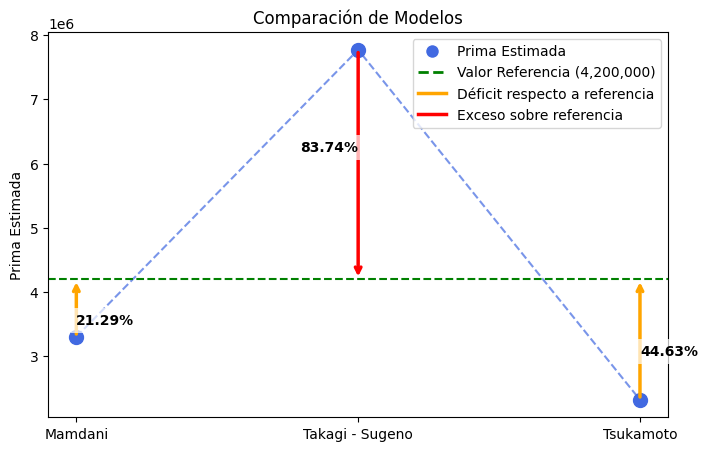

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
modelos = ["Mamdani", "Takagi - Sugeno", "Tsukamoto"]
primas_estimadas = np.array([3305700, 7771723, 2325469])
errores = np.array([21.29, 83.74, 44.63])  # Errores en porcentaje
valor_referencia = 4_200_000

# Posiciones en el eje X
x = np.arange(len(modelos))

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar la prima estimada como puntos
ax.scatter(x, primas_estimadas, color="royalblue", label="Prima Estimada", s=100, zorder=3)
ax.plot(x, primas_estimadas, color="royalblue", linestyle="dashed", alpha=0.7)  # Conectar puntos

# Línea de referencia en verde
ax.axhline(valor_referencia, color="green", linestyle="--", label="Valor Referencia (4,200,000)")

# Dibujar flechas indicando el error y mostrar el porcentaje de error con mejor visibilidad
for i in range(len(modelos)):
    color_flecha = "red" if primas_estimadas[i] > valor_referencia else "orange"

    # Determinar la posición del texto de error para que no se solape con el punto
    desplazamiento_texto = 200000 if primas_estimadas[i] > valor_referencia else -250000  
    alineacion_texto = "left" if i % 2 == 0 else "right"  # Alternar alineación para mejor lectura

    # Dibujar flecha desde la prima hasta el valor de referencia
    ax.annotate("", xy=(x[i], valor_referencia), xytext=(x[i], primas_estimadas[i]),
                arrowprops=dict(arrowstyle="->", color=color_flecha, lw=2.5))

    # Agregar texto del error (%) sin que se superponga con los puntos
    ax.text(x[i], (primas_estimadas[i] + valor_referencia) / 2 + desplazamiento_texto, 
            f"{errores[i]:.2f}%", ha=alineacion_texto, fontsize=10, color="black",
            fontweight="bold", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# Etiquetas y formato
ax.set_ylabel("Prima Estimada")
ax.set_title("Comparación de Modelos")
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Leyenda con explicación de las flechas
legend_handles = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="royalblue", markersize=10, label="Prima Estimada"),
    plt.Line2D([0], [0], linestyle="--", color="green", lw=2, label="Valor Referencia (4,200,000)"),
    plt.Line2D([0], [0], color="orange", lw=2.5, label="Déficit respecto a referencia"),
    plt.Line2D([0], [0], color="red", lw=2.5, label="Exceso sobre referencia")
]
ax.legend(handles=legend_handles, loc="upper right")

# Mostrar la gráfica
plt.show()
